Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future ver

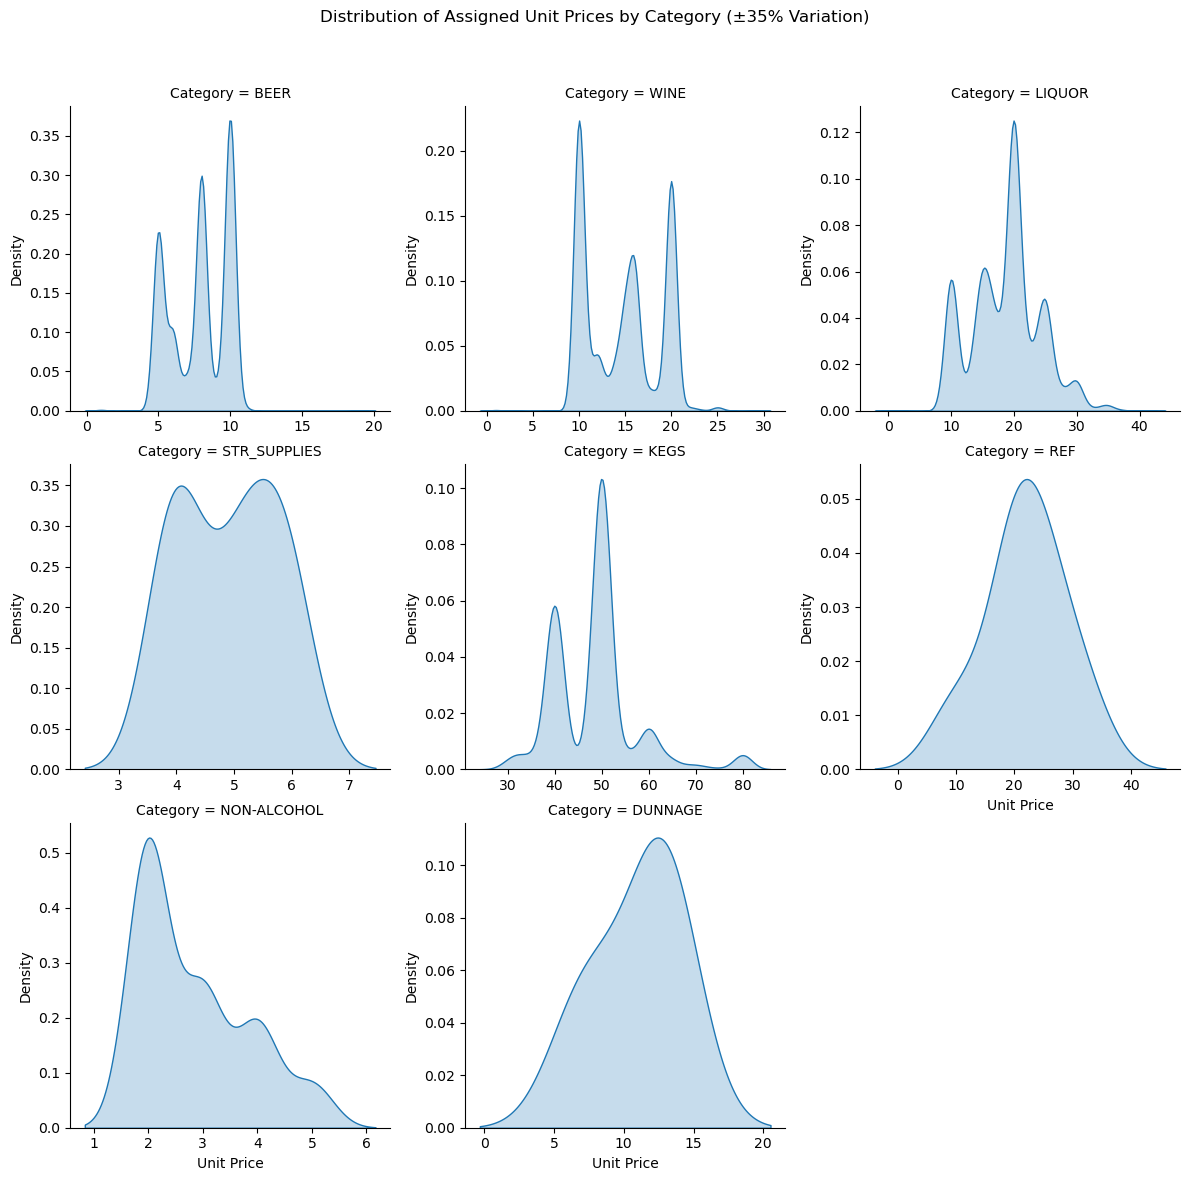

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your price_info dataset
price_info = pd.read_csv('price_info.csv')

# Create a KDE plot for each category
g = sns.FacetGrid(price_info, col="Category", col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "Unit Price", fill=True)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribution of Assigned Unit Prices by Category (±35% Variation)")
plt.savefig("unit_price_distribution_by_category.png")
plt.show()

/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/keziaersan/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

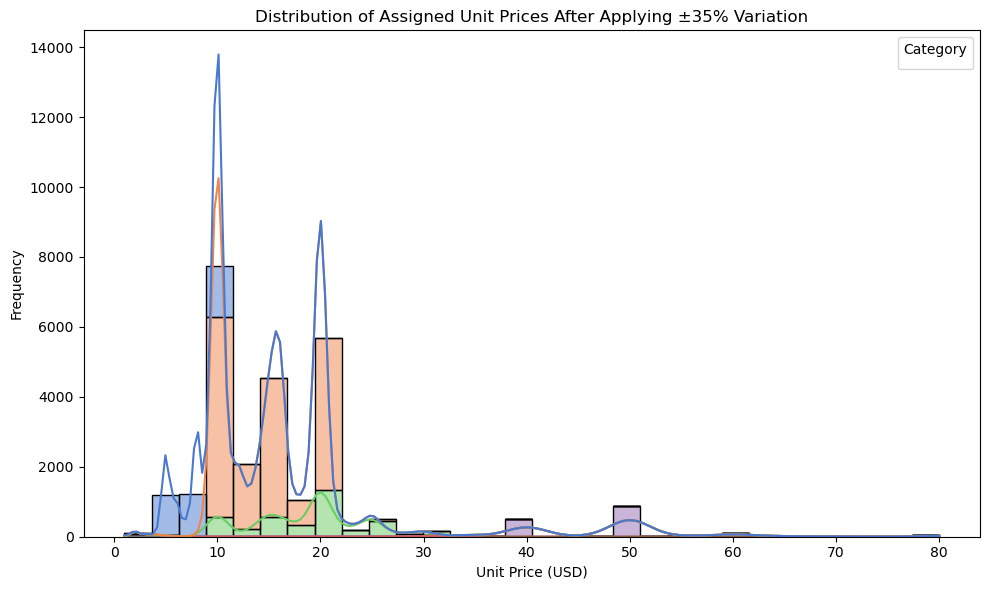

In [2]:
plt.figure(figsize=(10, 6))
sns.histplot(data=price_info, x='Unit Price', hue='Category', kde=True, bins=30, palette='muted', multiple="stack")
plt.title("Distribution of Assigned Unit Prices After Applying ±35% Variation")
plt.xlabel("Unit Price (USD)")
plt.ylabel("Frequency")
plt.legend(title='Category', loc='upper right')
plt.tight_layout()
plt.savefig("unit_price_distribution.png")
plt.show()

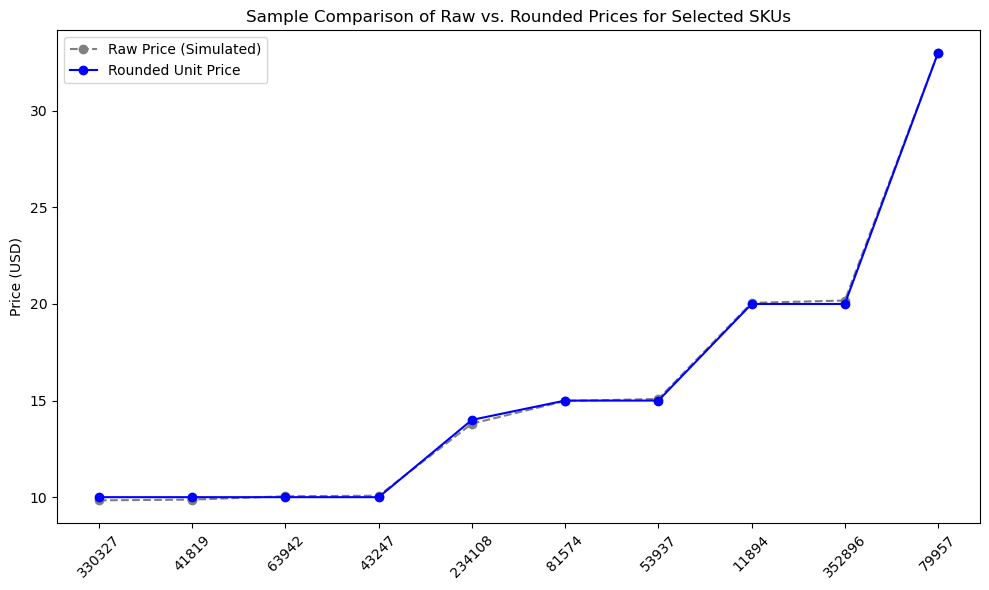

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
price_info = pd.read_csv('price_info.csv')

# Simulate pre-rounded raw price values for visualization (within ±0.25 range)
np.random.seed(42)
price_info['Raw Price (Simulated)'] = price_info['Unit Price'] + np.random.uniform(-0.25, 0.25, size=price_info.shape[0])

# Take a small sample of SKUs
sample = price_info[['SKU', 'Raw Price (Simulated)', 'Unit Price']].sample(10, random_state=42)
sample = sample.sort_values(by='Raw Price (Simulated)').reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(sample['Raw Price (Simulated)'], label='Raw Price (Simulated)', marker='o', linestyle='--', color='gray')
plt.plot(sample['Unit Price'], label='Rounded Unit Price', marker='o', linestyle='-', color='blue')

plt.xticks(ticks=range(len(sample)), labels=sample['SKU'], rotation=45)
plt.ylabel('Price (USD)')
plt.title('Sample Comparison of Raw vs. Rounded Prices for Selected SKUs')
plt.legend()
plt.tight_layout()
plt.savefig("raw_vs_rounded_price_lineplot.png")
plt.show()

In [4]:
price_info.head()

,SKU,Category,Average Category Cost,Unit Price,Raw Price (Simulated)
0,10346,BEER,8,8.0,7.937270
1,100009,WINE,15,20.0,20.225357
2,100012,WINE,15,18.0,18.115997
3,100023,WINE,15,16.0,16.049329
4,100024,WINE,15,10.0,9.828009


In [5]:
inventory_info = pd.read_csv('inventory_info.csv')

In [6]:
inventory_info.head()

,SKU,Category,Month,Monthly Sales,Beginning Inventory,Ending Inventory,Stockout Flag,Average Monthly Inventory
0,100007,WINE,1,0.0,NaN,NaN,False,NaN
1,100007,WINE,2,0.0,0.00,0.00,True,0.00
2,100007,WINE,3,0.0,0.00,0.00,True,0.00
3,100007,WINE,4,1000.0,1111.44,111.44,False,611.44
4,100007,WINE,5,1000.0,1272.90,272.90,False,772.90


In [7]:
leadtime_info = pd.read_csv('leadtime_info.csv')

In [8]:
leadtime_info.head()

,SKU,Category,Lead Time (days)
0,10346,BEER,12
1,100009,WINE,17
2,100012,WINE,14
3,100023,WINE,14
4,100024,WINE,21


In [9]:
orders_info = pd.read_csv('orders_info.csv')

In [11]:
orders_info.head()

,SKU,Category,Supplier,Order Placed Date,Availability,Expected Delivery Date,Order Quantity,Actual Delivery Date,Quantity Received,Quantity Accuracy,Delivery Status,Defect Flag
0,101532,WINE,THE SPANISH WINE IMPORTERS LLC,2024-03-21 02:25:33.755627,True,2024-04-08 02:25:33.755627,935,2024-04-09 02:25:33.755627,932,0,late,0
1,43233,WINE,WILSON DANIELS LTD,2024-10-28 02:25:33.755627,True,2024-11-17 02:25:33.755627,65,2024-11-15 02:25:33.755627,65,1,early,0
2,68271,BEER,VIN DIVINO LTD,2024-04-25 02:25:33.755627,True,2024-05-02 02:25:33.755627,431,2024-05-07 02:25:33.755627,431,1,late,0
3,42024,LIQUOR,BOSTON BEER CORPORATION,2024-09-20 02:25:33.755627,True,2024-10-06 02:25:33.755627,16,2024-10-08 02:25:33.755627,16,1,late,0
4,82403,WINE,CONSTANTINE WINES INC,2024-05-17 02:25:33.755627,True,2024-06-07 02:25:33.755627,981,2024-06-06 02:25:33.755627,978,0,early,0


In [12]:
main_extended = pd.read_csv('main_extended.csv')

In [13]:
main_extended.head()

,Month,SKU,Description,Category,Supplier,Sales
0,2022-01-01,102,TWO BOTTLE WINE TOTE,STR_SUPPLIES,Default,480.0
1,2022-01-01,104,FOUR BOTTLE WINE TOTE,STR_SUPPLIES,Default,8420.0
2,2022-01-01,105,WINE GIFT TOTE SINGLE BOTTLE,STR_SUPPLIES,Default,45372.0
3,2022-01-01,106,SIX BOTTLE WINE TOTE (NO LOGO),STR_SUPPLIES,Default,3505.0
4,2022-01-01,109,WINE TOTE WOOD HANDLE 2 POCKET 4 BTL,STR_SUPPLIES,Default,588.0
